## Importing the Halo Pipeline
In this section, we'll show the import statement and the initialization of the `HalosSkyPyPipeline` class from the `sim_pipeline.Pipelines.halos_pipeline` module.

We first create an instance of the `HalosSkyPyPipeline` class, which is imported from the `sim_pipeline.Pipelines.halos_pipeline` module. This pipeline will be used to process data from the YAML file, `halo.yml`. The default settings for various parameters, such as `m_max`, `m_min`, etc., have been carefully chosen to ensure optimal performance and accurate results. We'll delve into the specifics of these parameter choices and their importance in the subsequent sections. Additionally, you can refer to the `readme.md` file in the `data/Skypy` folder for more information on the default settings.

In [1]:
from sim_pipeline.Pipelines.halos_pipeline import HalosSkyPyPipeline

pipeline = HalosSkyPyPipeline(sky_area=0.0001,m_max='1.0E+16',m_min='1.0E+12',z_max=5.00)

print(pipeline)

After initializing the pipeline, we can access the `halos` property of the `HalosSkyPyPipeline` instance. The specific output include properties of the halos in certain sky area (here is $ 0.0001\ deg^2$ or $1296\ acrsec^2$) 's light cone such as their redshift, masses.

         z                 mass       
------------------- ------------------
  0.710299056970239  2237440958847.075
 2.2280918648949806  2790411097893.009
 2.3166535984010346 2441449888342.0767
0.43783014395838665 1872133008624.5645
 1.6448066092566775 3586625510356.2964
  2.531000755788136  2670090242134.466
  4.352654936403886 1167420674931.8853
 1.1560798785461508 1725701012377.8516
 1.0156725897952523  2344972922360.317
 1.2013097588148722 1028325855535.6498
                ...                ...
 2.1987879849798206 2217920669993.2983
 0.6794001194864546  71903080618780.97
  4.164079857804953 1972033042888.5051
  1.418319981339946  2084979665655.893
  3.991448141106712   1312128469854.57
 0.7657743011453454  30574688990311.51
  1.995480917643521  6602558844494.526
  1.158230176751047 1062502675209.2684
 1.7723289132338076  1577983970371.922
  2.531273986191761  6073763175510.305
 2.0663951220390224  41217144300650.95
Length = 53 rows


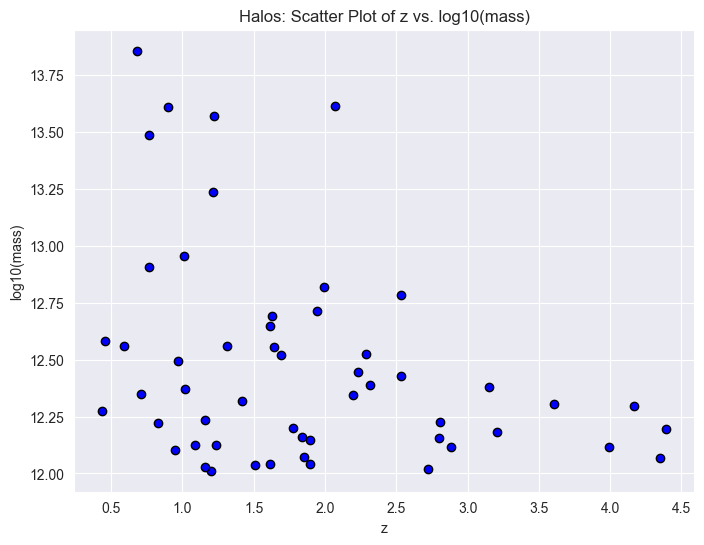

         z          ...          kappa         
------------------- ... -----------------------
              0.025 ...  0.00013397902836150057
0.07500000000000001 ... -0.00043862369117280363
0.12500000000000003 ...  -0.0013972477556442261
0.17500000000000002 ...  -0.0026409562548218675
0.22500000000000003 ...   -0.004084773702519722
 0.2750000000000001 ...   -0.005657705368735326
0.32500000000000007 ...   -0.007300958585450095
 0.3750000000000001 ...   -0.008966349481380522
 0.4250000000000001 ...   -0.010614879620253623
 0.4750000000000001 ...   -0.012215467994738962
                ... ...                     ...
  4.475000000000001 ...  -0.0004945751994291925
  4.525000000000001 ...  -0.0004290266397397602
  4.575000000000001 ... -0.00036511029738406364
  4.625000000000001 ...   -0.000302460417366035
  4.675000000000002 ... -0.00024126759153197952
  4.725000000000001 ... -0.00018250666520280845
  4.775000000000001 ...  -0.0001282145560370651
  4.825000000000001 ...  -8.182491892227

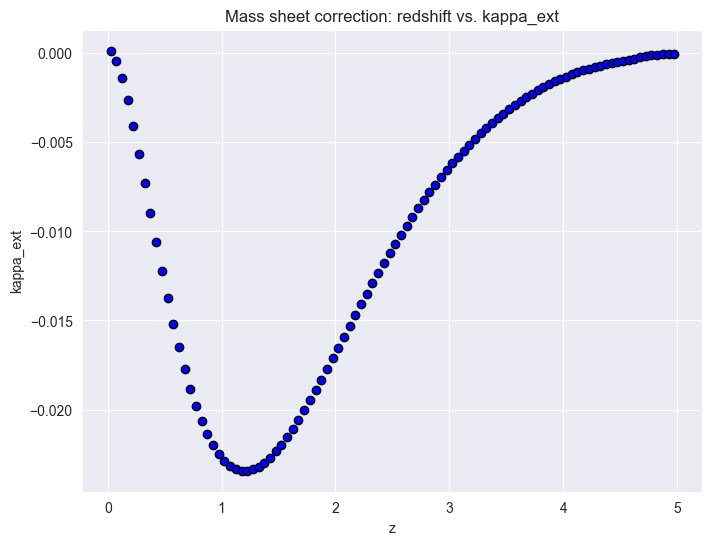

In [2]:
import matplotlib.pyplot as plt
import numpy as np

halos= pipeline.halos
mass_sheet_correction = pipeline.mass_sheet_correction
print(halos)
z_halos = halos['z']
mass_halos = halos['mass']

log_mass = np.log10(mass_halos)
plt.figure(figsize=(8, 6))
plt.scatter(z_halos, log_mass, c='blue', marker='o', edgecolors='black')
plt.title('Halos: Scatter Plot of z vs. log10(mass)')
plt.xlabel('z')
plt.ylabel('log10(mass)')
plt.grid(True)

# Show the plot
plt.show()
print(mass_sheet_correction)
redshifts_mass_correction = mass_sheet_correction['z']
#first_moment = mass_sheet_correction['first_moment']
kappa_ext = mass_sheet_correction['kappa']
plt.figure(figsize=(8, 6))
plt.scatter(redshifts_mass_correction, kappa_ext, c='blue', marker='o', edgecolors='black')
plt.title('Mass sheet correction: redshift vs. kappa_ext')
plt.xlabel('z')
plt.ylabel('kappa_ext')
plt.grid(True)





In [3]:
kwargs_interp = mass_sheet_correction['kwargs_interp']
print(kwargs_interp)

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     kwargs_interp                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
----------------

## Calculating the convergence and shear
The `HalosLens` class from the `sim_pipeline.halos.halos_lens` module is used to calculate the gravitational lensing effects from the simulated halos. The `HalosLens` class is initialized with the previously generated halos, the sky area, the cosmological parameters, and the number of samples. We then call the `get_convergence_shear` method to calculate the convergence $ \kappa $ and shear $ \gamma_1$, $\gamma_2 $ (or shear $\gamma_{tot}$) at the origin due to all the halos.

In [4]:
# Import HalosLens class from the sim_pipeline.halos module
from sim_pipeline.Halos.halos_lens import HalosLens
from lenstronomy.Cosmo.lens_cosmo import LensCosmo
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

# Instantiate the HalosLens class with the halo list computed above and a defined sky area
halos_lens = HalosLens(halos_list=halos,mass_correction_list= mass_sheet_correction,sky_area=0.0001,cosmo=cosmo, samples_number= 1000,RadialInterpolate=True)
# Get the convergence and shear values by calling the get_convergence_shear method
kappa,gamma1,gamma2 = halos_lens.get_convergence_shear(gamma12=True) #when gamma12=False,return kappa,gamma_tot
print('kappa at center is: ',kappa)
print('gamma1 at center is: ',gamma1)
print('gamma2 at center is: ',gamma2)
'''
lens_cosmo = [
                LensCosmo(
                    z_lens=z,
                    z_source=5.00,
                    cosmo=cosmo,
                )
                for z in redshifts_mass_correction
            ]

halos_lens2 = HalosLens(halos_list=halos,mass_correction_list= mass_sheet_correction,sky_area=0.0001,cosmo=cosmo, samples_number= 1)
kappa_ext = halos_lens2.kappa_ext_for_mass_sheet(z=redshifts_mass_correction, lens_cosmo=lens_cosmo, first_moment=first_moment)
print(kappa_ext)
print('kappa_ext at center is: ',kappa_ext)

plt.figure(figsize=(8, 6))
plt.scatter(redshifts_mass_correction, kappa_ext, c='blue', marker='o', edgecolors='black')
plt.title('Mass sheet correction: redshift vs. kappa_ext')
plt.xlabel('z')
plt.ylabel('kappa_ext')
plt.grid(True)
'''

C:\Users\TXZ27\AppData\Local\Programs\Python\Python310\lib\site-packages\numba\core\decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)


ValueError: RADIAL_INTERPOL is not a valid lens model. Supported are: ['ARC_PERT', 'CHAMELEON', 'CNFW', 'CNFW_ELLIPSE', 'CONST_MAG', 'CONVERGENCE', 'coreBURKERT', 'CORED_DENSITY', 'CORED_DENSITY_2', 'CORED_DENSITY_2_MST', 'CORED_DENSITY_EXP', 'CORED_DENSITY_EXP_MST', 'CORED_DENSITY_MST', 'CORED_DENSITY_ULDM_MST', 'CSE', 'CTNFW_GAUSS_DEC', 'CURVED_ARC_CONST', 'CURVED_ARC_SIS_MST', 'CURVED_ARC_SPP', 'CURVED_ARC_SPT', 'CURVED_ARC_TAN_DIFF', 'DIPOLE', 'DOUBLE_CHAMELEON', 'EPL', 'EPL_BOXYDISKY', 'EPL_NUMBA', 'EPL_Q_PHI', 'ElliSLICE', 'FLEXION', 'FLEXIONFG', 'GAUSSIAN', 'GAUSSIAN_ELLIPSE_KAPPA', 'GAUSSIAN_ELLIPSE_POTENTIAL', 'GAUSSIAN_KAPPA', 'GNFW', 'HERNQUIST', 'HERNQUIST_ELLIPSE', 'HERNQUIST_ELLIPSE_CSE', 'HESSIAN', 'INTERPOL', 'INTERPOL_SCALED', 'LOS', 'LOS_MINIMAL', 'MULTIPOLE', 'MULTI_GAUSSIAN_KAPPA', 'MULTI_GAUSSIAN_KAPPA_ELLIPSE', 'NFW', 'NFW_ELLIPSE', 'NFW_ELLIPSE_CSE', 'NFW_ELLIPSE_GAUSS_DEC', 'NFW_MC', 'NFW_MC_ELLIPSE', 'NIE', 'NIE_POTENTIAL', 'NIE_SIMPLE', 'PEMD', 'PJAFFE', 'PJAFFE_ELLIPSE', 'POINT_MASS', 'SERSIC', 'SERSIC_ELLIPSE_GAUSS_DEC', 'SERSIC_ELLIPSE_KAPPA', 'SERSIC_ELLIPSE_POTENTIAL', 'SHAPELETS_CART', 'SHAPELETS_POLAR', 'SHEAR', 'SHEAR_GAMMA_PSI', 'SHEAR_REDUCED', 'SHIFT', 'SIE', 'SIS', 'SIS_TRUNCATED', 'SPEMD', 'SPEP', 'SPL_CORE', 'SPP', 'SYNTHESIS', 'TABULATED_DEFLECTIONS', 'TNFW', 'TNFWC', 'TNFW_ELLIPSE', 'TRIPLE_CHAMELEON', 'ULDM'].

In [4]:
'''
result = ", ".join(map(str, first_moment))

print(result)
'''

'\nresult = ", ".join(map(str, first_moment))\n\nprint(result)\n'

lens kwargs [{'Rs': 3.3789934112342834, 'alpha_Rs': 0.18856091015354506, 'center_x': -2.246742305402623, 'center_y': -13.119267379824215}, {'Rs': 3.1160077658142025, 'alpha_Rs': 0.1912122918519856, 'center_x': -20.173844551735964, 'center_y': 0.7825931623968235}, {'Rs': 2.503711508423799, 'alpha_Rs': 0.2006029437160193, 'center_x': -9.286725640109383, 'center_y': 1.3343652042449705}, {'Rs': 3.458007785303309, 'alpha_Rs': 0.1878845576142572, 'center_x': 8.334638593455479, 'center_y': 7.656703238812113}, {'Rs': 3.412294234463679, 'alpha_Rs': 0.18826963341365185, 'center_x': 8.639312813530614, 'center_y': 5.270177572323646}, {'Rs': 3.7964364265012764, 'alpha_Rs': 0.18551071640735925, 'center_x': -9.630960852890615, 'center_y': 9.622383233552272}, {'Rs': 3.8443366469718163, 'alpha_Rs': 0.18523548548526458, 'center_x': 6.652675319824705, 'center_y': -14.563282871385546}, {'Rs': 3.3973398614123984, 'alpha_Rs': 0.18839929604773722, 'center_x': -6.673180662605925, 'center_y': -12.5858641050671

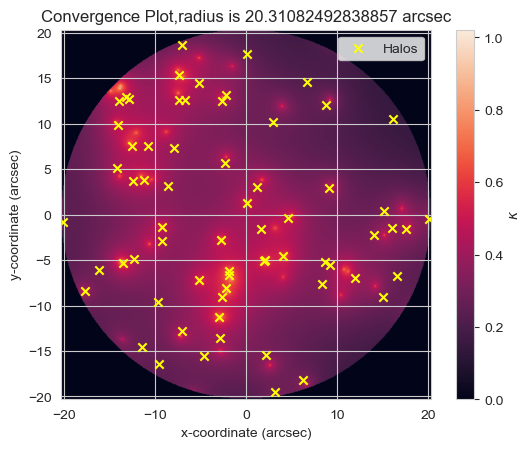

In [5]:
halos_lens2 = HalosLens(halos_list=halos,mass_correction_list=mass_sheet_correction, mass_sheet=True,sky_area=0.0001,cosmo=cosmo, samples_number= 1000, RadialInterpolate=True)

halos_lens2.plot_convergence()

lens kwargs [{'Rs': 3.3380677917594235, 'alpha_Rs': 0.18542156904710022, 'center_x': -14.003678026610135, 'center_y': -1.8317731841534108}, {'Rs': 3.0782673702039496, 'alpha_Rs': 0.1880288080250373, 'center_x': 5.548198891704468, 'center_y': 14.838252065277718}, {'Rs': 2.473387109409612, 'alpha_Rs': 0.19726311539864044, 'center_x': -5.532522998779768, 'center_y': -16.0073068889961}, {'Rs': 3.416125161237839, 'alpha_Rs': 0.18475647706721096, 'center_x': 4.776206647176534, 'center_y': 13.389322754503258}, {'Rs': 3.3709652827967074, 'alpha_Rs': 0.18513514175899504, 'center_x': 3.6452083124049586, 'center_y': -6.279247853737613}, {'Rs': 3.7504548297231013, 'alpha_Rs': 0.18242215782313614, 'center_x': -14.31899787361981, 'center_y': -9.610425919943474}, {'Rs': 3.7977748933370985, 'alpha_Rs': 0.18215150920681628, 'center_x': -3.7917007366472077, 'center_y': -4.375956039414475}, {'Rs': 3.3561920337982136, 'alpha_Rs': 0.18526264564640899, 'center_x': 15.848513212894517, 'center_y': -0.37331322

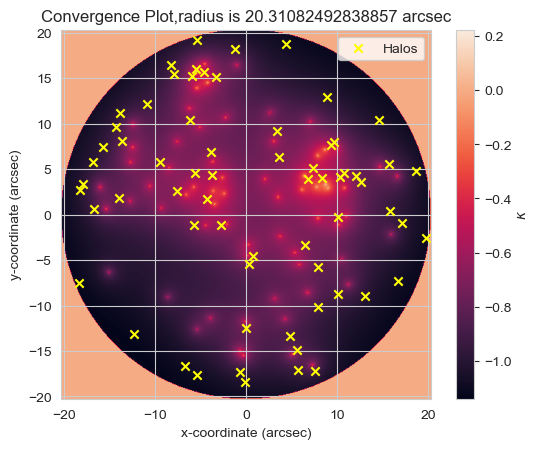

In [14]:
halos_lens4 = HalosLens(halos_list=halos,mass_correction_list=mass_sheet_correction, mass_sheet=True,sky_area=0.0001,cosmo=cosmo, samples_number= 1000, RadialInterpolate=False)

halos_lens4.plot_convergence()

lens kwargs [{'Rs': 3.3380677917594235, 'alpha_Rs': 0.18542156904710022, 'center_x': -2.2639638340510193, 'center_y': 18.651684908221668}, {'Rs': 3.0782673702039496, 'alpha_Rs': 0.1880288080250373, 'center_x': -14.024212650340944, 'center_y': 14.641899174633275}, {'Rs': 2.473387109409612, 'alpha_Rs': 0.19726311539864044, 'center_x': 11.259010100970277, 'center_y': -13.478784766610817}, {'Rs': 3.416125161237839, 'alpha_Rs': 0.18475647706721096, 'center_x': -16.16844712379707, 'center_y': -8.1047293341388}, {'Rs': 3.3709652827967074, 'alpha_Rs': 0.18513514175899504, 'center_x': -10.508608930266995, 'center_y': -10.505479030362492}, {'Rs': 3.7504548297231013, 'alpha_Rs': 0.18242215782313614, 'center_x': 8.110138109031304, 'center_y': 14.00066573899282}, {'Rs': 3.7977748933370985, 'alpha_Rs': 0.18215150920681628, 'center_x': 8.015928651805023, 'center_y': -8.36065761514493}, {'Rs': 3.3561920337982136, 'alpha_Rs': 0.18526264564640899, 'center_x': 10.379013726159831, 'center_y': 12.071144344

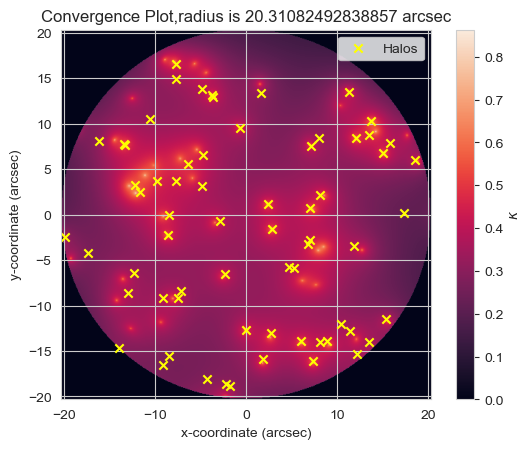

In [12]:
halos_lens3 = HalosLens(halos_list=halos,mass_correction_list=False, mass_sheet=False,sky_area=0.0001,cosmo=cosmo, samples_number= 1000, RadialInterpolate=True)

halos_lens3.plot_convergence()

### We can also get the lists of kappa and gamma values over the certain sky area by calling the `get_kappa_gamma_distib` method. To set `gamma_tot=True`, we can get the lists of `[kappa,gamma_tot]` with a length of `samples_number`

In [6]:
kappa_gamma_distribution = halos_lens.get_kappa_gamma_distib(gamma_tot=True, diff=None)
print(kappa_gamma_distribution)

[[0.29441953 0.0845639 ]
 [0.38076627 0.05269493]
 [0.35312817 0.03565391]
 ...
 [0.30589838 0.11874879]
 [0.37680937 0.13743192]
 [0.32194601 0.0215369 ]]


### We visualize the distributions of the modified kappa and gamma values using histograms.
The variable `modified_kappa_halos` is calculated by subtracting the mean of the kappa values (`mean_kappa`) from each individual kappa value in `kappa_values_halos`. modified_kappa_halos = kappa_values_halos - mean_kappa

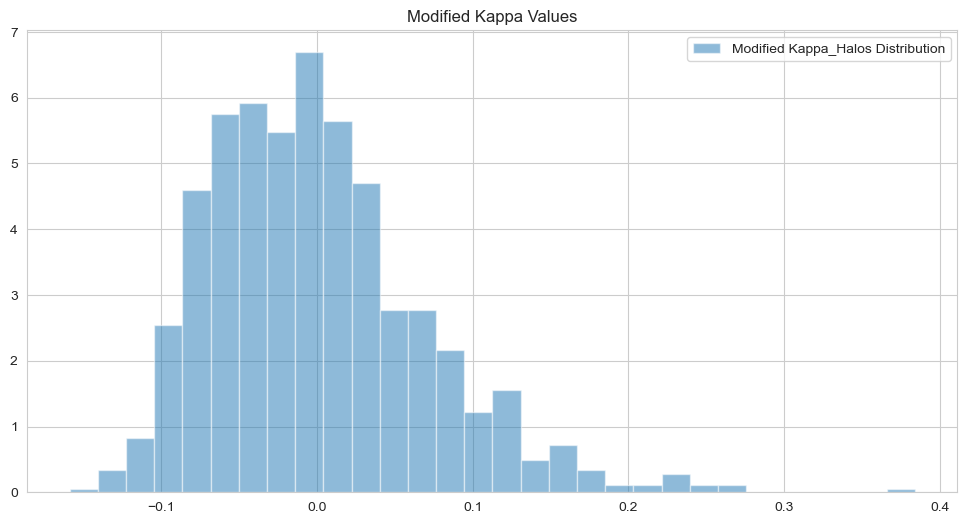

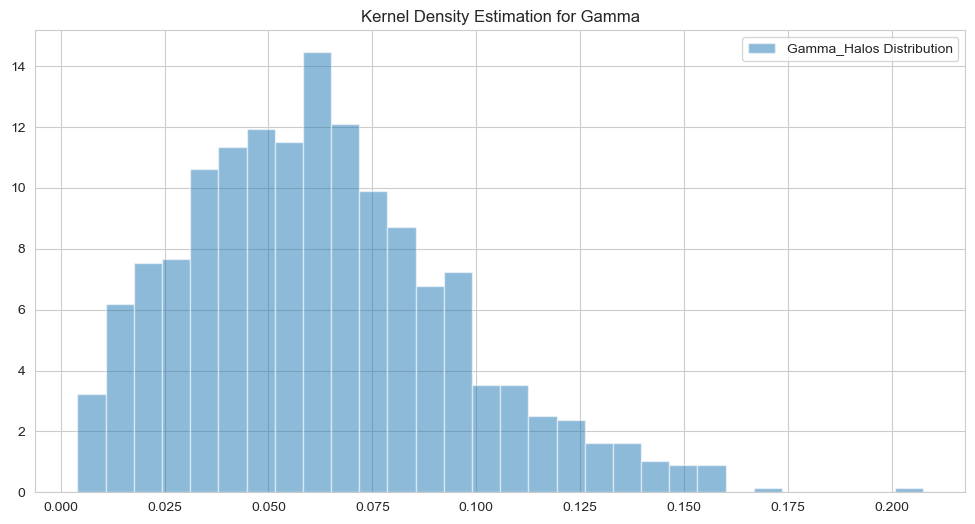

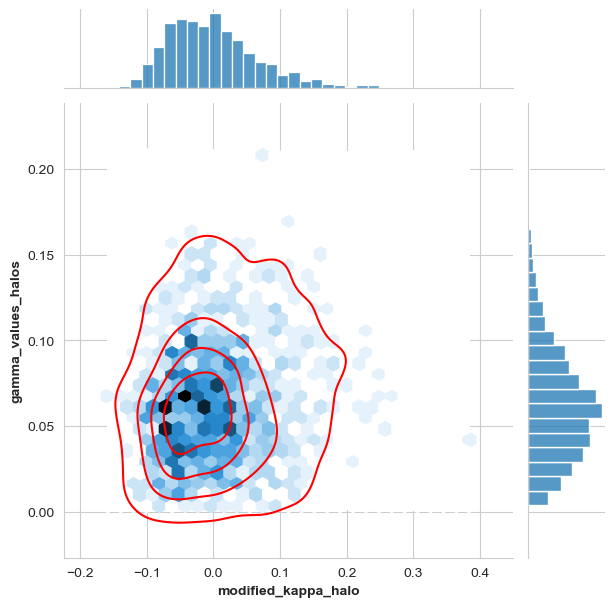

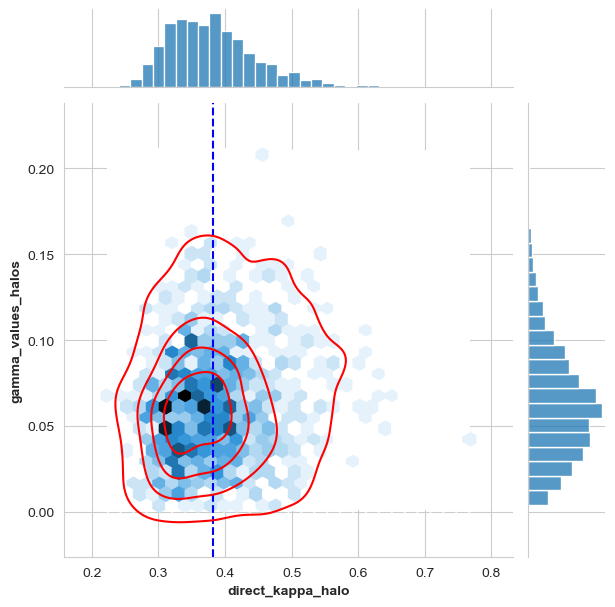

Spearman correlation coefficient:  0.11337712137712139
Kendall Tau correlation coefficient:  0.07535135135135135


In [7]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

kappa_gamma_distribution = np.array(kappa_gamma_distribution)  # Convert list of lists to numpy array
kappa_values_halos = kappa_gamma_distribution[:, 0]  # Get the first column of each row
gamma_values_halos = kappa_gamma_distribution[:, 1]  # Get the first column of each row

mean_kappa = np.mean(kappa_values_halos)

modified_kappa_halos = kappa_values_halos - mean_kappa

plt.figure(figsize=(12, 6))
plt.hist(modified_kappa_halos, bins=30, density=True, alpha=0.5, label='Modified Kappa_Halos Distribution')
plt.title('Modified Kappa Values')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.hist(gamma_values_halos, bins=30, density=True, alpha=0.5, label='Gamma_Halos Distribution')
plt.title('Kernel Density Estimation for Gamma')
plt.legend()
plt.show()

modified_plot = sns.jointplot(x=modified_kappa_halos, y=gamma_values_halos,kind='hex')
modified_plot.plot_joint(sns.kdeplot, color="r", zorder=3, levels=5)
modified_plot.ax_joint.set_xlabel('modified_kappa_halo', fontweight='bold')
modified_plot.ax_joint.set_ylabel('gamma_values_halos', fontweight='bold')
plt.show()

unmodified_plot = sns.jointplot(x=kappa_values_halos, y=gamma_values_halos,kind='hex')
unmodified_plot.plot_joint(sns.kdeplot, color="r", zorder=3, levels=5)
unmodified_plot.ax_joint.axvline(x=mean_kappa, color='blue', linestyle='--')
unmodified_plot.ax_joint.set_xlabel('direct_kappa_halo', fontweight='bold')
unmodified_plot.ax_joint.set_ylabel('gamma_values_halos', fontweight='bold')
plt.show()

from scipy.stats import spearmanr, kendalltau
print('Spearman correlation coefficient: ', spearmanr(modified_kappa_halos, gamma_values_halos)[0])
print('Kendall Tau correlation coefficient: ', kendalltau(modified_kappa_halos, gamma_values_halos)[0])

Finally, we use a Gaussian Kernel Density Estimation (KDE) to generate a random sample of kappa and gamma values based on the existing distributions. The joint distribution of these random kappa and gamma values is plotted using seaborn's `jointplot` function.

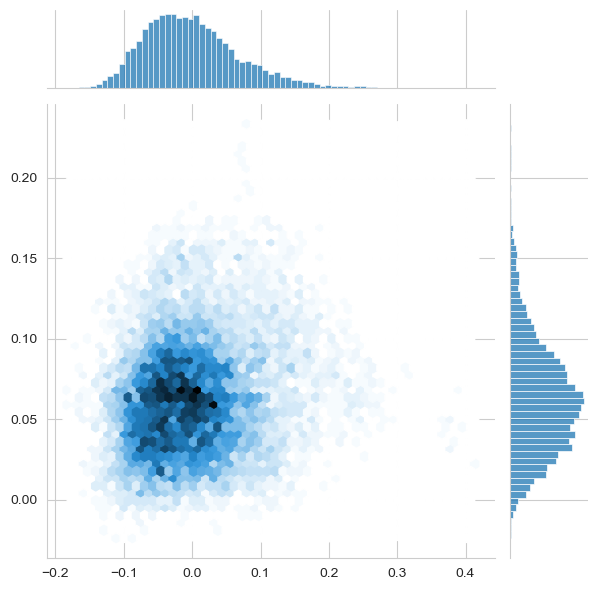

In [8]:
import seaborn as sns
kernel = stats.gaussian_kde(np.vstack([modified_kappa_halos, gamma_values_halos]))
n = 10000  # Number of random numbers to generate
kappa_random_halos, gamma_random_halos = kernel.resample(n)
sns.jointplot(x=kappa_random_halos, y=gamma_random_halos, kind='hex')
plt.show()

# Run the method ` run_halos_without_kde()` to obtain kappa and gamma values without using KDE.

 This will generate ` n_iterations` sets of halo lists under the specified `sky_area`.
 For each set, it will simulate `samples_number` times to get the kappa and gamma values
 at the origin. The obtained values will be directly appended without any additional processing.

In [9]:
from sim_pipeline.Halos.halos_plus_glass import run_halos_without_kde_by_multiprocessing
from astropy.cosmology import FlatLambdaCDM,default_cosmology
import matplotlib.pyplot as plt

cosmo = default_cosmology.get()

nk,ng = run_halos_without_kde_by_multiprocessing(n_iterations=400, sky_area=0.0001, samples_number=2,cosmo=cosmo,m_max='1.0E+16',m_min='1.0E+12', z_max=5)


The 400 halo-lists took 129.36566877365112 seconds to run


Visualization of ` run_halos_without_kde()`

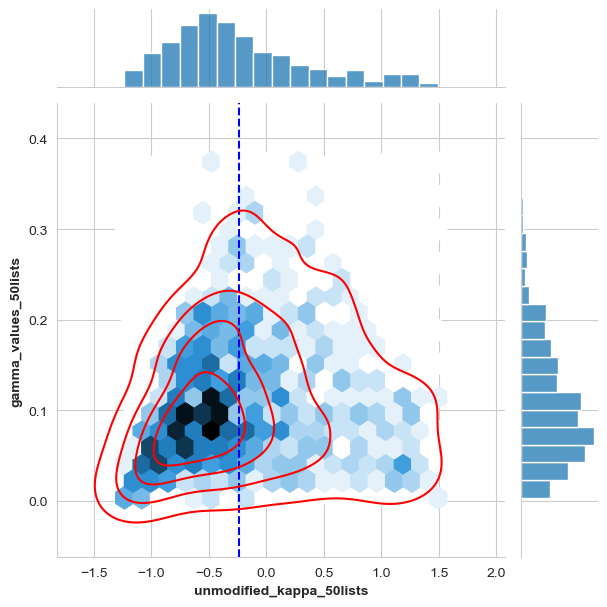

Spearman correlation coefficient:  0.18184305756727748
Kendall Tau correlation coefficient:  0.12993742177722153


In [10]:
import seaborn as sns
from scipy.stats import spearmanr, kendalltau
modified_plot = sns.jointplot(x=nk, y=ng,kind='hex')
modified_plot.plot_joint(sns.kdeplot, color="r", zorder=3, levels=5)
modified_plot.ax_joint.axvline(x=np.mean(nk), color='blue', linestyle='--')
modified_plot.ax_joint.set_xlabel('unmodified_kappa_50lists', fontweight='bold')
modified_plot.ax_joint.set_ylabel('gamma_values_50lists', fontweight='bold')
plt.show()
print('Spearman correlation coefficient: ', spearmanr(nk, ng)[0])
print('Kendall Tau correlation coefficient: ', kendalltau(nk, ng)[0])